# VAE Evaluation Notebook
This notebook loads a trained BetaVAE and evaluates reconstructions, KL, and latent traversals.


In [1]:
from src.vae.evaluate_run import (
    load_vae, val_loader_from_yaml, 
    basic_metrics, mu_variance, 
    plot_recon, latent_traverse, 
    pca_traverse
)

# Set paths

project_name = 'celebA-vae'
run_name = 'beta5-perc'

run_dir  = f'runs/{project_name}/{run_name}'
save_dir = f'results/{project_name}/{run_name}'

In [2]:
# Prepare validation loader

vae, train_cfg, device = load_vae(run_dir)

# pick the 'val' split from the same data.yaml you used to train
in_ch     = vae.config.encoder.in_channels
img_size  = vae.config.img_size
data_yaml = train_cfg.data_yaml
bs        = train_cfg.batch_size

val_loader = val_loader_from_yaml(
    data_yaml = data_yaml,
    img_size  = img_size,
    in_ch     = in_ch,
    bs        = bs
)


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/home/tonso/code/00--research/latent-reason/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/tonso/code/00--research/latent-reason/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/tonso/code/00--research/latent-reason/venv/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth


In [3]:
# Basic MSE and KL metrics
basic_metrics(vae, val_loader, device, save_dir)


MSE(x, recon_mu):   0.051006
MSE(x, recon_zero): 0.321474
True KL  (mean):    70.630676


In [4]:
# μ‐variance across validation set
# mus = mu_variance(vae, val_loader, device)


Figure saved to: results/celebA-vae/beta5-perc/plot_recon.png


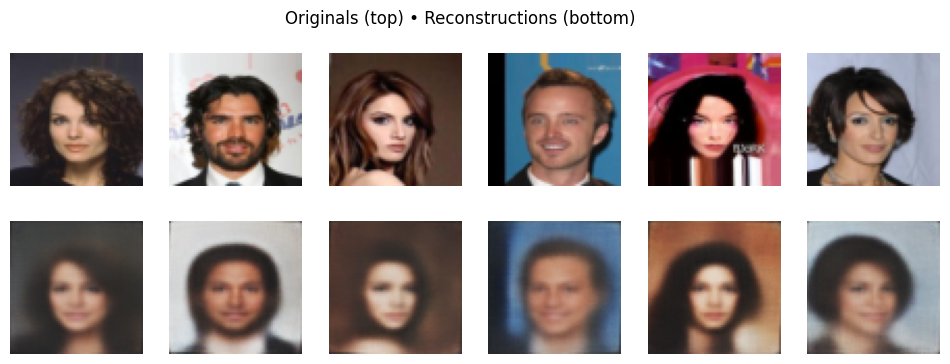

In [5]:
# Plot reconstructions
plot_recon(vae, val_loader, device, n=6, save_dir=save_dir)


Figure saved to: results/celebA-vae/beta5-perc/latent_traverse.png


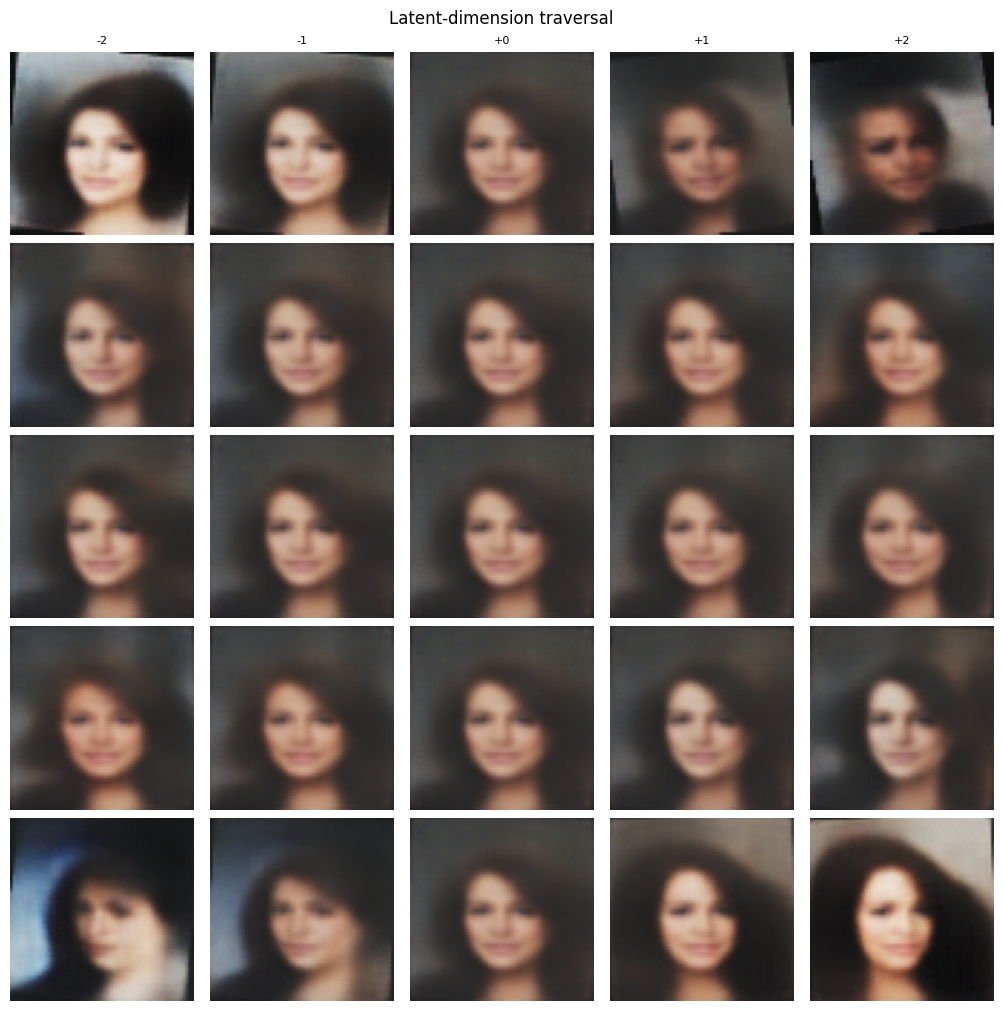

In [6]:
# Latent dimension traversal
latent_traverse(
    vae, val_loader, device, 
    dims=5, scale=3.0,
    save_dir=save_dir
    )


Figure saved to: results/celebA-vae/beta5-perc/pca_traverse.png


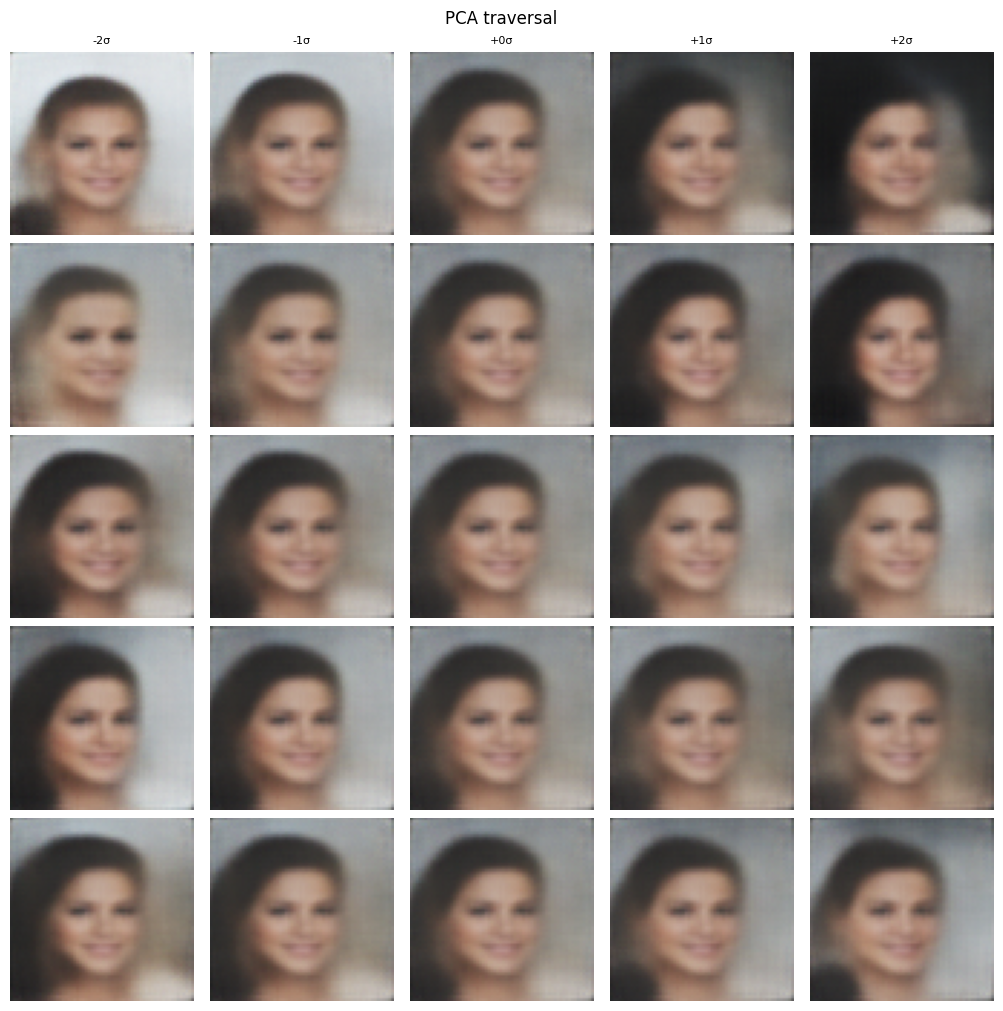

In [7]:
# PCA-based traversal
pca_traverse(
    vae, val_loader, device, 
    n_pcs=5, scale=1.0,
    save_dir=save_dir
    )


In [8]:
from src.vae.evaluate_run import (
    get_all_latents, compute_latent_stats,
    plot_pca_3d_interactive, posterior_histogram, 
    plot_latent_stats_heatmap
)

mu, logvar = get_all_latents(vae, val_loader, device)
stats      = compute_latent_stats(mu, logvar, save_dir)


Figure saved to: results/celebA-vae/beta5-perc/latent_stats_heatmap.png


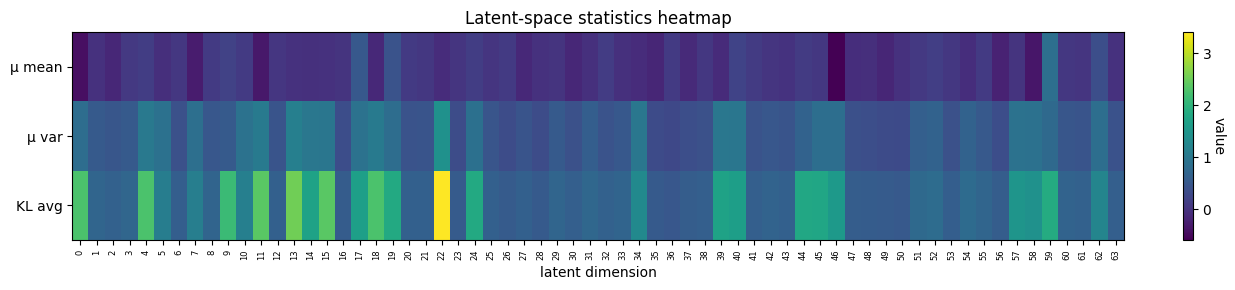

In [9]:
plot_latent_stats_heatmap(stats, save_dir)



In [10]:
plot_pca_3d_interactive(mu)


Figure saved to: results/celebA-vae/beta5-perc/posterior_histogram.png


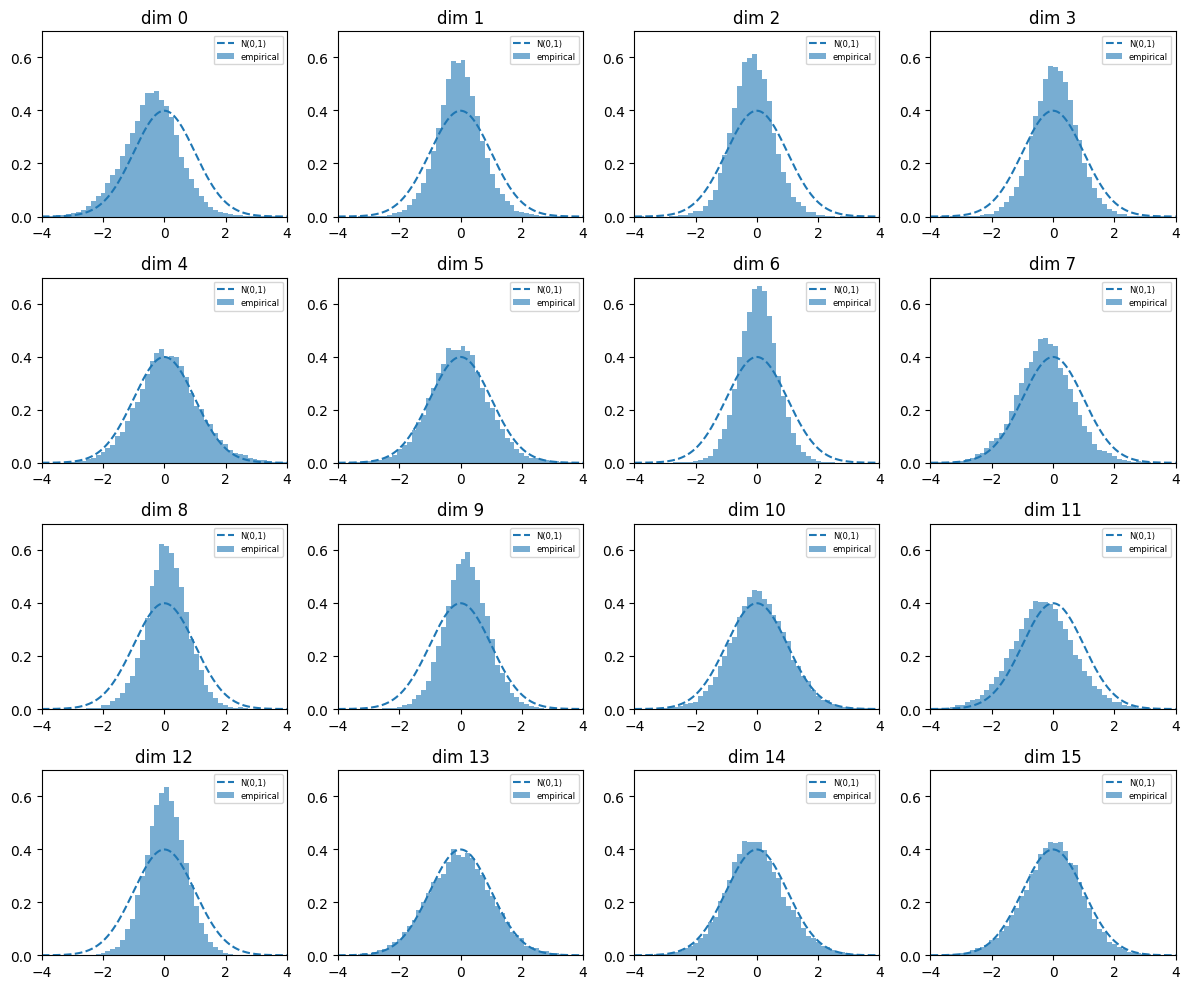

In [11]:
posterior_histogram(mu, max_dims=16, save_dir=save_dir)
